# Context du projet 

Nous travaillons dans une agence data spécialisée dans le marketing.

Projet e-commerce : 
- Nous devons faire un analyse de données pour comprendre le comportement des clients. 
- Notre client attend une segmentation RFM et un analyse par cohortes. 
- Nous disposons d'un dataset appelé db_customers.csv et de deux jours pour apporter une réponse (Jeudi 16h).

# Import

## Import des librairies 

In [181]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Time features
from datetime import timedelta

# TreeMap 
import squarify
import plotly.express as px

# Cohort
from operator import attrgetter
import matplotlib.colors as mcolors

## Import des données

In [182]:
df = pd.read_csv('data/db_customers.csv')

In [183]:
df.head(5)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


## Basics info 

# EDA

## Unique Values

In [184]:
from prettytable import PrettyTable

unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "UniqueValues"]
for i in df.columns: 
    count = df[i].nunique()
    unique_counts.add_row([i, count])
print(unique_counts)

+-------------------------------+--------------+
|            Feature            | UniqueValues |
+-------------------------------+--------------+
|           Unnamed: 0          |    105383    |
|            order_id           |    99441     |
|          customer_id          |    99441     |
|          order_status         |      8       |
|    order_purchase_timestamp   |    98875     |
| order_delivered_customer_date |    95664     |
|          payment_type         |      5       |
|      payment_installments     |      24      |
|         payment_value         |    29077     |
|          review_score         |      5       |
|       customer_unique_id      |    96096     |
|    customer_zip_code_prefix   |    14994     |
|         customer_city         |     4119     |
|         customer_state        |      27      |
| product_category_name_english |      71      |
+-------------------------------+--------------+


## Grouping by country

In [185]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

In [186]:
CountryList = df["customer_state"].unique()
customer_country = df[["customer_state", "customer_unique_id"]].drop_duplicates()
display(customer_country.groupby(['customer_state'])['customer_unique_id'].aggregate('count').reset_index().sort_values(
    'customer_unique_id', ascending=False))

,customer_state,customer_unique_id
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


## Missing Values

In [187]:
# Checking for missing values 
df.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

In [188]:
# Check the duplicates 
print("No.of Duplicate rows : ", df.duplicated().sum())

No.of Duplicate rows :  0


## Analyse 

In [189]:
df["order_purchase_timestamp_year"]=pd.DatetimeIndex(df["order_purchase_timestamp"]).year
df["order_purchase_timestamp_month"]=pd.DatetimeIndex(df["order_purchase_timestamp"]).month
evolution = df.groupby(by=["order_purchase_timestamp_year","order_purchase_timestamp_month"]).sum().reset_index()

<AxesSubplot:>

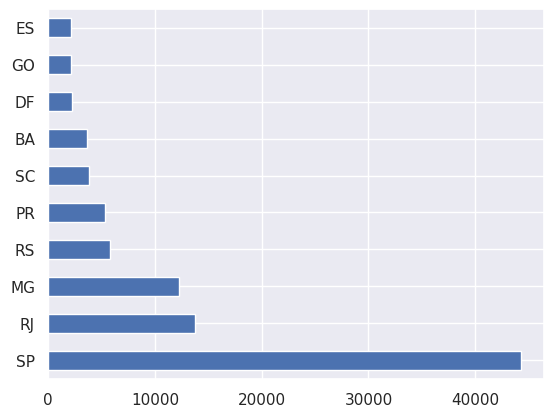

In [190]:
df["customer_state"].value_counts()[:10].plot(kind='barh')

In [191]:
# regroupement par catégorie de produit. Affiche CA par categorie. On peut egalement voir le score review

df.groupby(by=["product_category_name_english"]).sum()

# montant total depensé par pays origine des acheteurs. Top pays client.

top_country = df.groupby(by=["customer_city"]).sum().sort_values(by=["payment_value"], ascending=False)
top_country

# regroupement par note client, par ordre decroissant sur le montant total

m = df.groupby(by=["review_score"]).sum().sort_values(by=["payment_value"], ascending=False)
m

# Import d'un fichier contenant les coordoonnées géographiques de chaque pays

brazil_lat_long = pd.read_csv('data/Brazil_states.csv')

#merge avec notre dataset

merge_lats_long_df = df.merge(brazil_lat_long,how="left",left_on = "customer_state",right_on="subdivision")

# groupby + rename column 
df_lat = merge_lats_long_df.groupby("name").median()
df_lat_reset = df_lat.reset_index().rename(columns = {"name": "state"})

# Plot du salaire médian par pays

fig = px.scatter_mapbox(df_lat_reset, lat="latitude", lon="longitude", color="state",
                        size="payment_value",zoom=1, mapbox_style="carto-positron",title = "Total amount of the payment by States")
fig.update_layout(
    title_x=0.45,
    title_y=0.95)
fig.show()

/tmp/ipykernel_512/1785134040.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



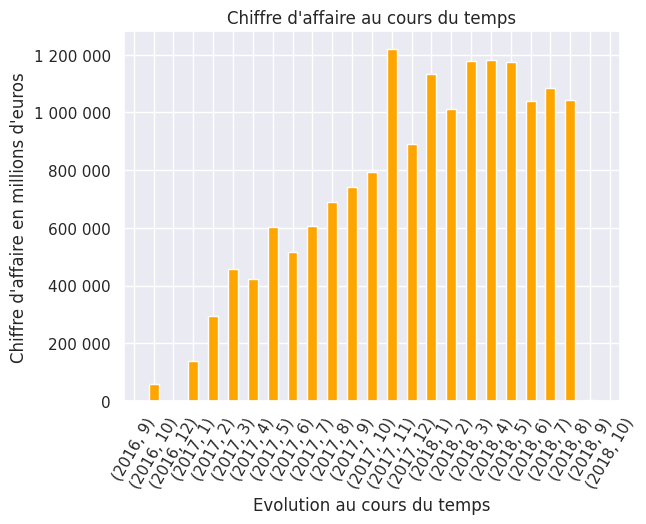

In [192]:
evolution_2 = df.groupby(by=["order_purchase_timestamp_year","order_purchase_timestamp_month"]).sum()
g = evolution_2["payment_value"].plot(kind="bar",color="orange")
plt.title("Chiffre d'affaire au cours du temps")
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
g.set_yticklabels([0,"200 000","400 000","600 000","800 000","1 000 000","1 200 000"])
plt.xticks(rotation=60)
plt.xlabel("Evolution au cours du temps")
plt.ylabel("Chiffre d'affaire en millions d'euros")
plt.xticks(rotation=60)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

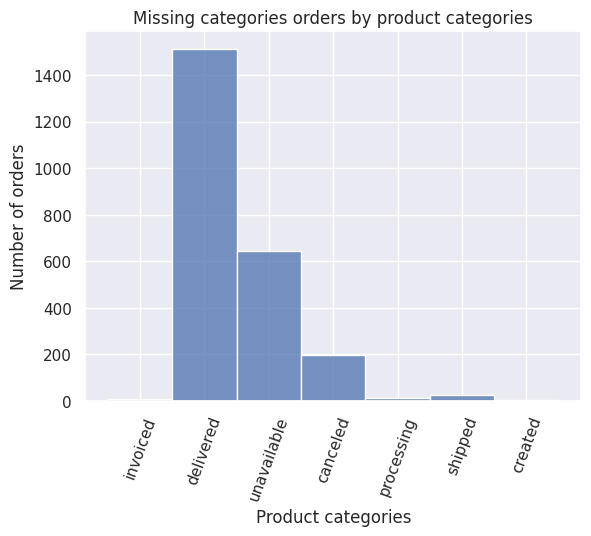

In [193]:
# Missing categories orders by product categories
product_nan = df[df["product_category_name_english"].isna()]
sns.histplot(data=product_nan, x="order_status")
plt.title("Missing categories orders by product categories")
plt.xlabel("Product categories")
plt.ylabel("Number of orders")
plt.xticks(rotation=70)

In [1]:
# Dates de livraison manquantes observées par leur statut de livraison
delivered_nan = df[df["order_delivered_customer_date"].isna()]
sns.histplot(data=delivered_nan, x="order_status")
plt.title("Missing order delivered customer date by order status")
plt.xlabel("Order status")
plt.ylabel("Number of orders")
plt.xticks(rotation=70)

NameError: name 'df' is not defined

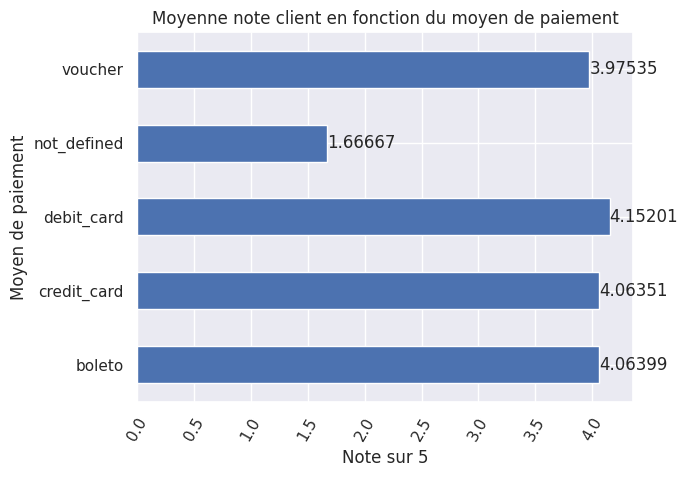

In [195]:
# Note moyenne par moyen de paiement
review = df.groupby(by=["payment_type"]).mean()
e = review["review_score"].plot(kind="barh")
plt.title("Moyenne note client en fonction du moyen de paiement")
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
e.bar_label(e.containers[0])
plt.xticks(rotation=60)
plt.xlabel("Note sur 5")
plt.ylabel("Moyen de paiement")
plt.xticks(rotation=60)
plt.show()

/tmp/ipykernel_512/2068563398.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 1000x3000 with 0 Axes>

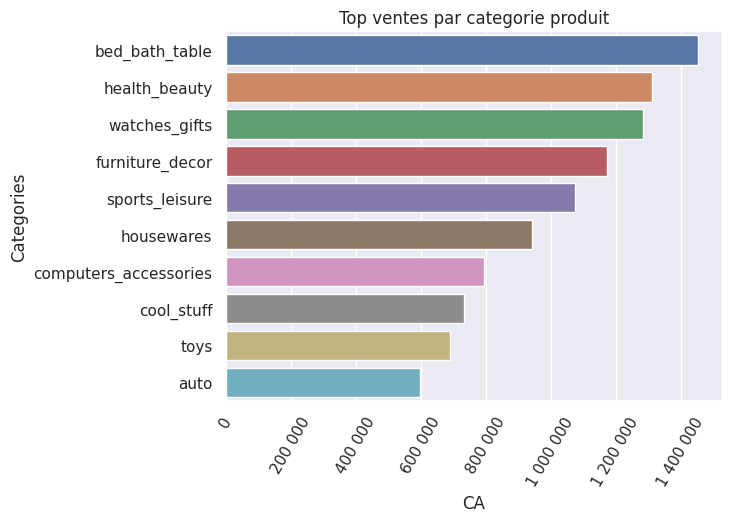

<Figure size 1000x3000 with 0 Axes>

In [196]:
# Top vente par categorie produit
top_sales = df.groupby(by=["product_category_name_english"]).sum().sort_values(by=["payment_installments"], ascending=False)
top_sales
import matplotlib.pyplot as plt
g = sns.barplot(data=top_sales.nlargest(10, 'payment_value'), y=top_sales.index[:10], x="payment_value")
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
g.set_xticklabels([0,"200 000","400 000","600 000","800 000","1 000 000","1 200 000", "1 400 000"])
plt.xticks(rotation=60)
plt.title("Top ventes par categorie produit")
plt.ylabel("Categories")
plt.xlabel("CA")
plt.figure(figsize=(10,30))

## RFM

In [197]:
df_no_nan.head(5)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


### Grouby RFM

In [200]:
# calculer la date maximale dans la colonne "order_purchase_timestamp"
max_date = df["order_purchase_timestamp"].max()

# ajouter un jour à la date maximale
new_max_date = max_date + pd.Timedelta(days=1)

# créer la nouvelle colonne "recency_purchase" en utilisant la date maximale modifiée
df["recency_purchase"] = (new_max_date - df["order_purchase_timestamp"]).dt.days

In [201]:
# Group by 
RFM = df.groupby(["customer_unique_id"]).agg({
    'recency_purchase' : 'mean',
    'order_id' : 'count',
    'payment_value' : 'sum'
}).round(1)

RFM.rename(columns={ 'recency_purchase': 'Recency', 'order_id': 'Frequence', 'payment_value': 'TotalPrice'}, inplace = True)
RFM = RFM.sort_values(by = ["Frequence"], ascending = False)

In [202]:
RFM

,Recency,Frequence,TotalPrice
customer_unique_id,,,
9a736b248f67d166d2fbb006bcb877c3,437.9,54,394.8
8af7ac63b2efbcbd88e5b11505e8098a,546.0,29,458.0
569aa12b73b5f7edeaa6f2a01603e381,498.0,26,62.7
1d2435aa3b858d45c707c9fc25e18779,639.0,24,233.7
90807fdb59eec2152bc977feeb6e47e7,327.0,24,215.7
...,...,...,...
57cd75ea0d4df751cb635cbae8596411,374.0,1,158.1
57cd06ab5e1452f461555dda1deb3d5c,257.0,1,124.3
57cce8aaddd9bf6acc0d54ffdd68a0ac,84.0,1,350.3


### Plot RFM distributions

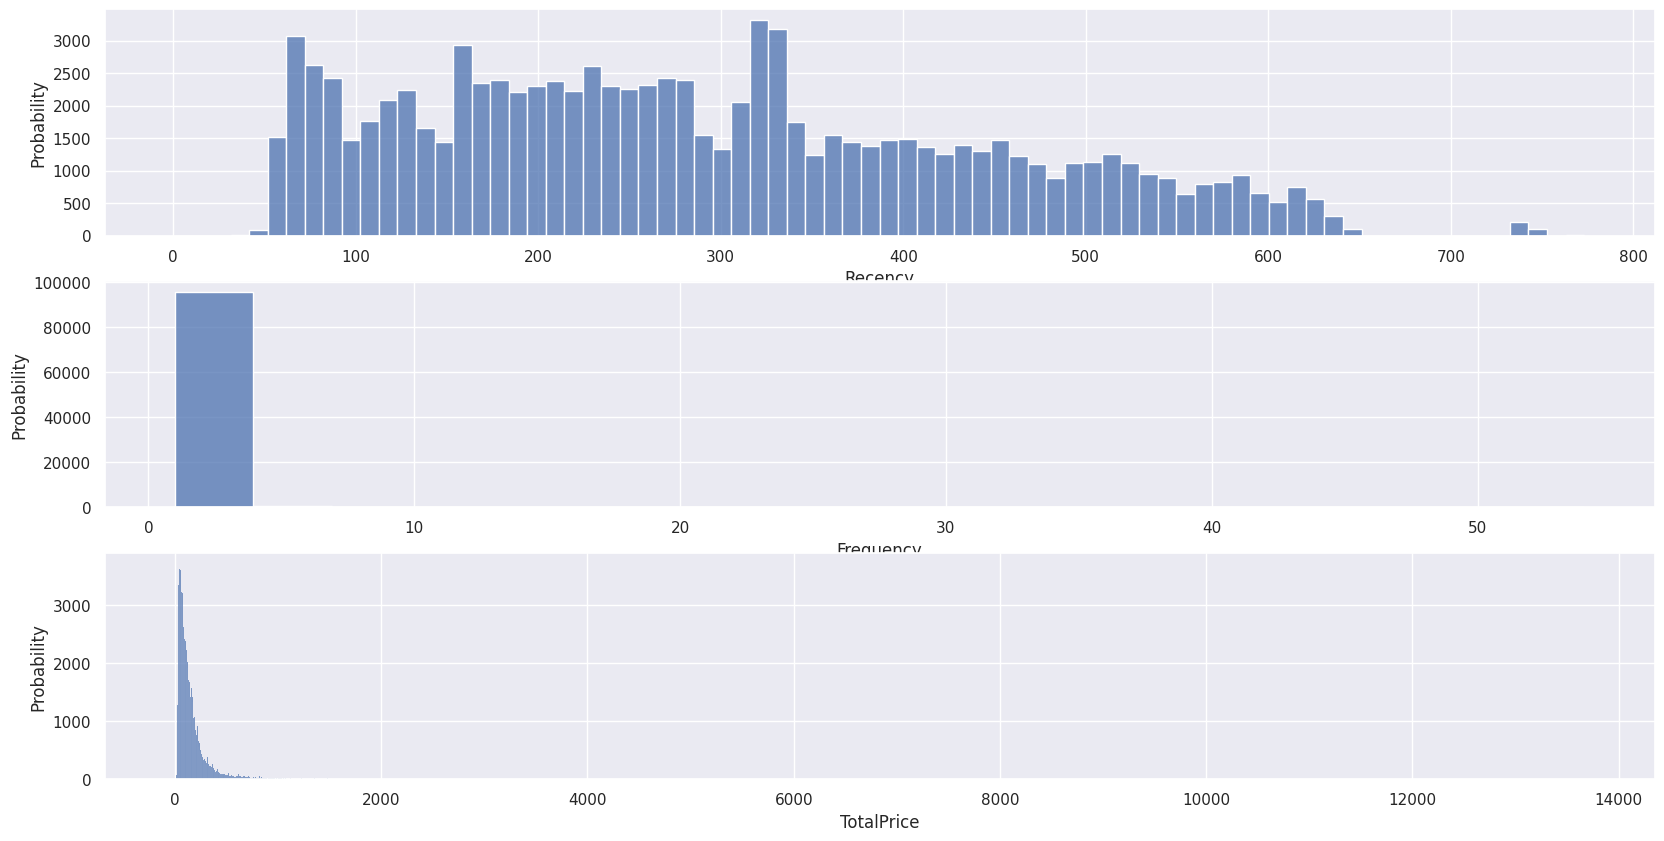

In [203]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1);
sns.histplot(RFM['Recency'])
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Recency', fontsize=12)

plt.subplot(3, 1, 2);
sns.histplot(RFM['Frequence'])
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Frequency', fontsize=12)

plt.subplot(3, 1, 3);
sns.histplot(RFM["TotalPrice"])
plt.ylabel('Probability', fontsize=12)
plt.xlabel('TotalPrice', fontsize=12)

plt.show()

### Create R, F and M groups based on Quartiles

In [204]:
# Create R, F and M groups based on Quartiles
# Creating labels for each group

Rlabel = [4, 3, 2, 1]
Mlabel = [1, 2, 3, 4]
Flabel = [1, 2, 3, 4]

# Splitting metrics into segments by using quartiles
Rgrp = pd.qcut(RFM["Recency"], q=4, labels = Rlabel)
Mgrp = pd.qcut(RFM["TotalPrice"], q=4, labels = Mlabel)

# Define the custom groups for the Frequency column
def group_frequency(x):
    if x == 1:
        return 1
    elif 1 < x <= 10:
        return 2
    elif 10 < x <= 100:
        return 3
    else:
        return 4


# Creating new columns and assigning R, F, M segmented values 
RFM["R"] = Rgrp.values
RFM['F'] = RFM['Frequence'].apply(group_frequency)
RFM["M"] = Mgrp.values

### Calculate RFM score

In [205]:
# Method 1 RFM score - Add a new column to combine RFM score
RFM['Score'] = RFM[['R', 'F', 'M']].sum(axis = 1)

display(RFM.head())
print("Maximum RFM Score : ",RFM['Score'].max())
print("Maximum RFM Score : ",RFM['Score'].min())
print(RFM["Recency"].min())

,Recency,Frequence,TotalPrice,R,F,M,Score
customer_unique_id,,,,,,,
9a736b248f67d166d2fbb006bcb877c3,437.9,54,394.8,1,3,4,8
8af7ac63b2efbcbd88e5b11505e8098a,546.0,29,458.0,1,3,4,8
569aa12b73b5f7edeaa6f2a01603e381,498.0,26,62.7,1,3,1,5
1d2435aa3b858d45c707c9fc25e18779,639.0,24,233.7,1,3,4,8
90807fdb59eec2152bc977feeb6e47e7,327.0,24,215.7,2,3,4,9


Maximum RFM Score :  11
Maximum RFM Score :  3
1.0


In [214]:
# Method 2 RFM score - Add a new column to combine RFM score
RFM["RFM_Concat"] = RFM.apply(lambda x : str(x['R']) + str(x["F"]) + str(x["M"]), axis = 1)
display(RFM.head())

,Recency,Frequence,TotalPrice,R,F,M,Score,RFM_Concat,RFM_Level
customer_unique_id,,,,,,,,,
9a736b248f67d166d2fbb006bcb877c3,437.9,54,394.8,1,3,4,8,134,Champions
8af7ac63b2efbcbd88e5b11505e8098a,546.0,29,458.0,1,3,4,8,134,Champions
569aa12b73b5f7edeaa6f2a01603e381,498.0,26,62.7,1,3,1,5,131,Promising
1d2435aa3b858d45c707c9fc25e18779,639.0,24,233.7,1,3,4,8,134,Champions
90807fdb59eec2152bc977feeb6e47e7,327.0,24,215.7,2,3,4,9,234,Champions


### Segmentation clients base on RFM score

In [215]:
# Adding customer in each segment bins to based on RFM score
def rfm_level(df):
    if(df['Score'] >= 10):
        return 'Goat'
    elif (df['Score'] <= 9) and (df['Score'] >= 7): return 'Champions'
    elif (df['Score'] < 7) and (df['Score'] >= 5): return 'Promising'
    elif (df['Score'] < 5) and (df['Score'] >= 3): return 'Needs Attention'
    
    else: return 'Requires activation'
    
RFM['RFM_Level'] = RFM.apply(rfm_level, axis = 1)
display(RFM.head())

,Recency,Frequence,TotalPrice,R,F,M,Score,RFM_Concat,RFM_Level
customer_unique_id,,,,,,,,,
9a736b248f67d166d2fbb006bcb877c3,437.9,54,394.8,1,3,4,8,134,Champions
8af7ac63b2efbcbd88e5b11505e8098a,546.0,29,458.0,1,3,4,8,134,Champions
569aa12b73b5f7edeaa6f2a01603e381,498.0,26,62.7,1,3,1,5,131,Promising
1d2435aa3b858d45c707c9fc25e18779,639.0,24,233.7,1,3,4,8,134,Champions
90807fdb59eec2152bc977feeb6e47e7,327.0,24,215.7,2,3,4,9,234,Champions


Proportions des catégories

In [216]:
RFM["RFM_Level"].value_counts(normalize=True)

Promising          0.422671
Champions          0.387581
Needs Attention    0.182973
Goat               0.006774
Name: RFM_Level, dtype: float64

Ne pas oublier de mieux équilibrer les segmentations 

### Calculating mean in each segment for better segment stats

In [217]:
# Calculating mean in each segment bins for better segment stats
RFM_stats = RFM.groupby('RFM_Level').agg({
    'Recency' : 'mean',
    'Frequence' : 'mean',
    'TotalPrice' : ['mean', 'count']
}).round(1)

# RFM_stats.columns = RFM_stats.columns.droplevel()
RFM_stats.columns = ['Recency_Mean', 'Frequence_mean', 'TotalPrice_mean', 'TotalPrice_count']
RFM_stats = RFM_stats.reset_index()
display(RFM_stats)

,RFM_Level,Recency_Mean,Frequence_mean,TotalPrice_mean,TotalPrice_count
0,Champions,192.5,1.2,260.4,37245
1,Goat,111.3,2.3,528.3,651
2,Needs Attention,447.7,1.0,57.2,17583
3,Promising,314.3,1.1,129.1,40617


### Plotting a map based on segment stats for better understanding

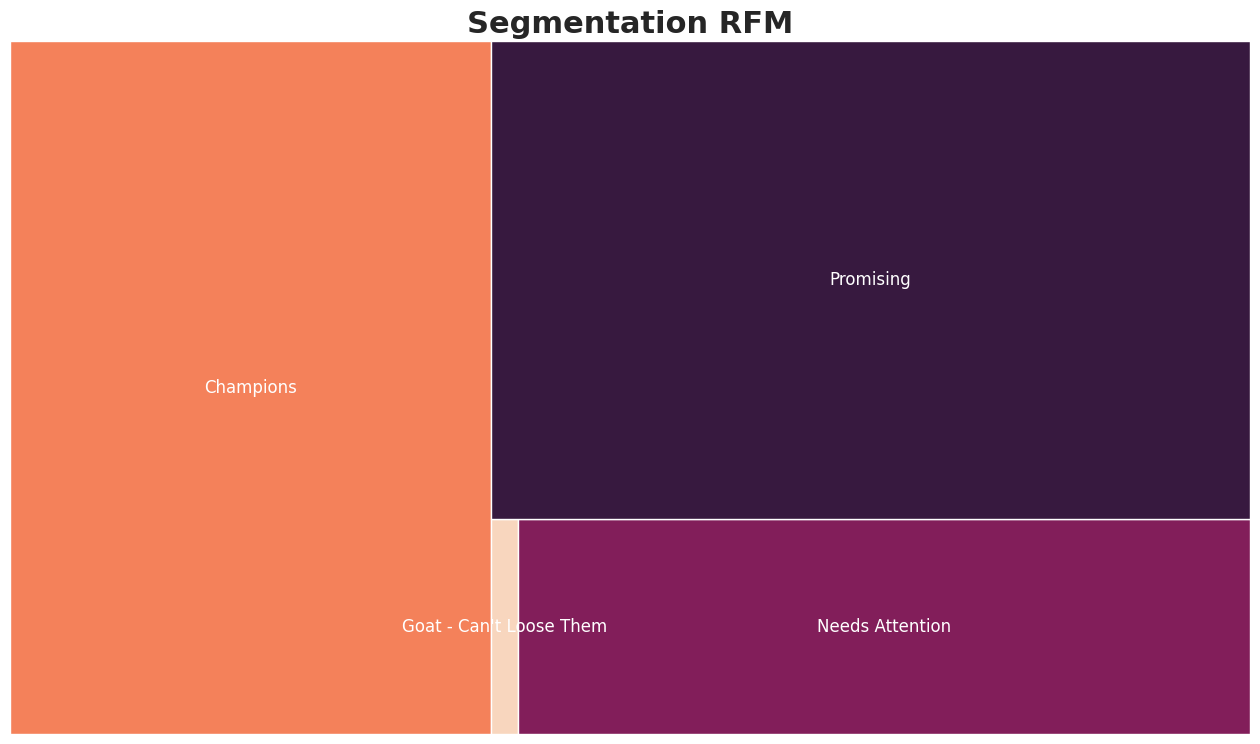

In [218]:
# Plotting a map based on segment stats
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_stats["TotalPrice_count"],
              label=['Champions', 'Goat - Can\'t Loose Them', 'Needs Attention', 'Promising'],
              text_kwargs={'color':'white'})
plt.title("Segmentation RFM", fontsize=22, fontweight="bold")
plt.axis("off")
plt.show()

# Cohorts

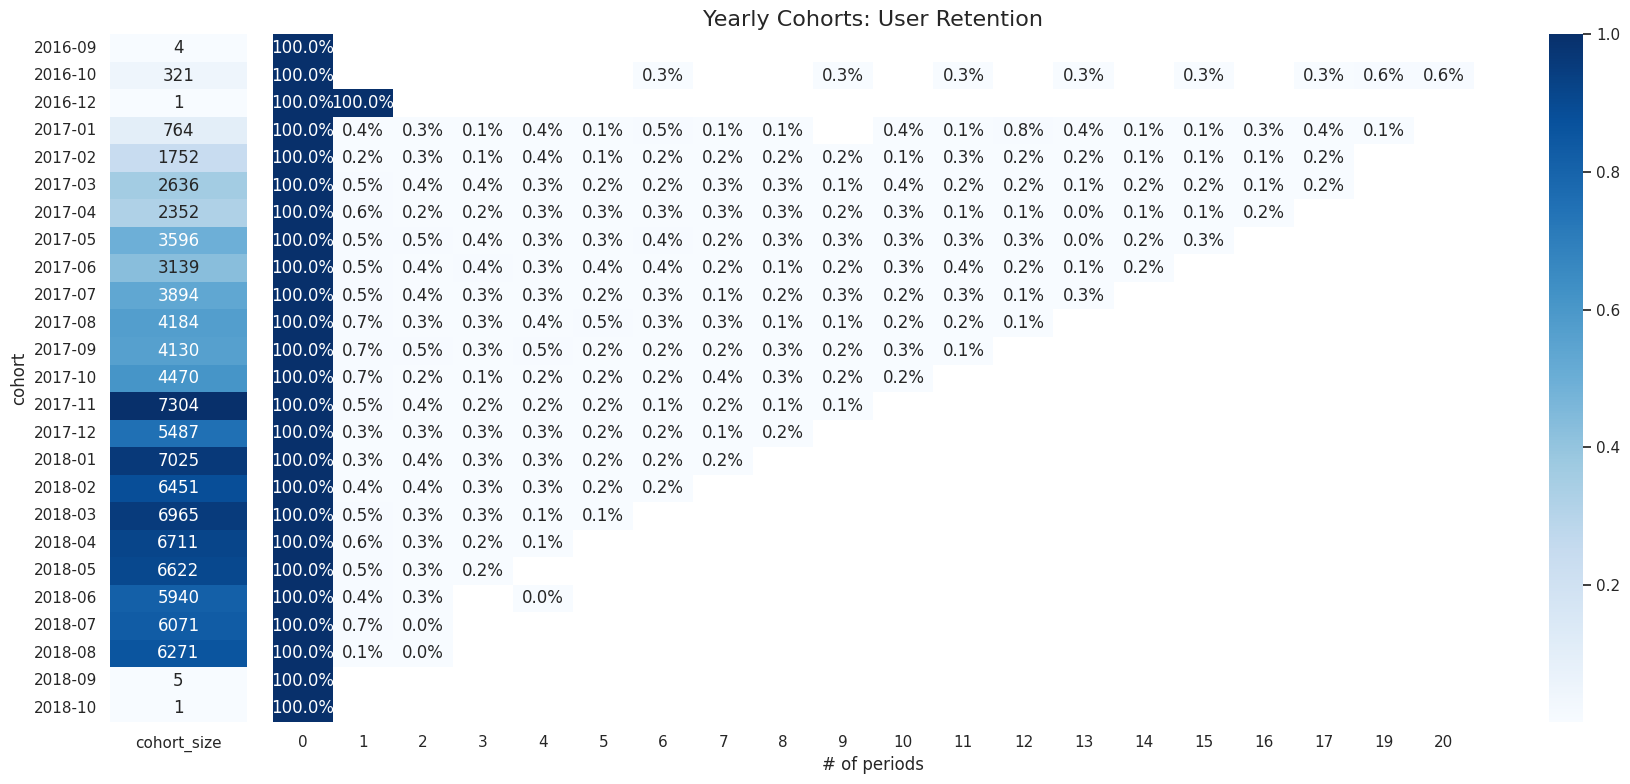

In [219]:
test = df[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()


test['order_month'] = test['order_purchase_timestamp'].dt.to_period('M')
test['cohort'] = test.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 


df_cohort = test.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')


cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)


with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.1%', 
                cmap='Blues', 
                ax=ax[1])
    ax[1].set_title('Yearly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap='Blues', 
                ax=ax[0])
    
    fig.tight_layout()